# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import pandas as pd
import tensorflow as tf
%matplotlib inline

In [2]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2019-04-04 02:12:45--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.06s   

2019-04-04 02:12:45 (1.11 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [3]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
X_train = np.asanyarray(df[["ENGINESIZE"]])
y_train = np.asanyarray(df[["CO2EMISSIONS"]])

__Step 0:__ Initialize the variables and placeholders.

In [5]:
a = tf.Variable(20.0)
b = tf.Variable(30.0)

__Step 1:__ Define the linear regression function.

In [6]:
y = a*X_train + b

__Step 2:__ Define the ```loss``` function.

In [7]:
loss = tf.reduce_mean(tf.square(y-y_train))

__Step 3:__ Define the ```optimizer```.

In [8]:
optimizer = tf.train.GradientDescentOptimizer(0.05)

__Step 4:__ Define the training method of our graph.

In [9]:
train = optimizer.minimize(loss)

__Step 5:__ Initialize the variables.

In [10]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

__Step 6:__ Start the optimization.

In [11]:
epoch = 100
loss_vals = []
train_data = []
print("Step\t loss\t\t a\t b")
print("-----------------------------------------")
for step in range(epoch):
    _, loss_val, a_val, b_val = sess.run([train, loss, a, b])
    loss_vals.append(loss_val)
    if step % 5 == 0:
        print(step, "\t", "{0:.2f}".format(loss_val), "\t", "{0:.2f}".format(a_val), "\t", "{0:.2f}".format(b_val))
        train_data.append([a_val, b_val])
print("-----------------------------------------")
sess.close()

Step	 loss		 a	 b
-----------------------------------------
0 	 27056.27 	 77.14 	 45.93
5 	 1895.91 	 58.89 	 47.42
10 	 1766.35 	 57.69 	 52.86
15 	 1656.73 	 56.40 	 57.87
20 	 1561.76 	 55.21 	 62.54
25 	 1479.49 	 54.09 	 66.89
30 	 1408.22 	 53.06 	 70.93
35 	 1346.47 	 52.09 	 74.70
40 	 1292.98 	 51.20 	 78.20
45 	 1246.64 	 50.36 	 81.46
50 	 1206.50 	 49.58 	 84.50
55 	 1171.72 	 48.86 	 87.32
60 	 1141.58 	 48.18 	 89.95
65 	 1115.48 	 47.56 	 92.40
70 	 1092.87 	 46.97 	 94.68
75 	 1073.28 	 46.43 	 96.80
80 	 1056.31 	 45.92 	 98.77
85 	 1041.60 	 45.45 	 100.61
90 	 1028.86 	 45.02 	 102.32
95 	 1017.83 	 44.61 	 103.91
-----------------------------------------


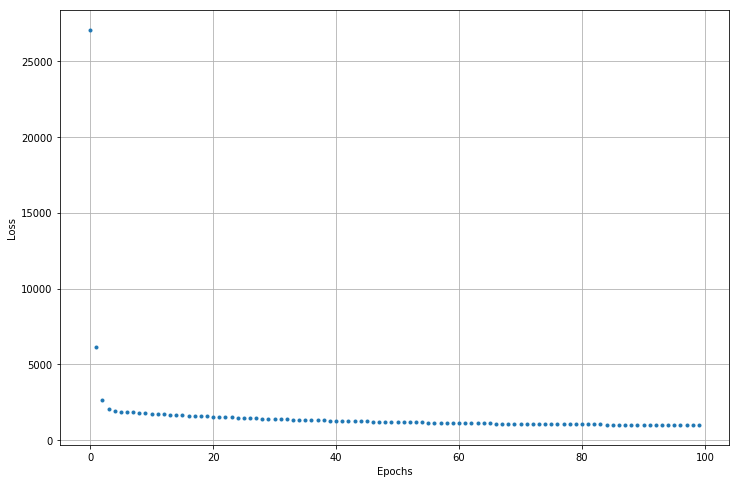

In [12]:
plt.figure(figsize=(12,8))
plt.plot(loss_vals, '.')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

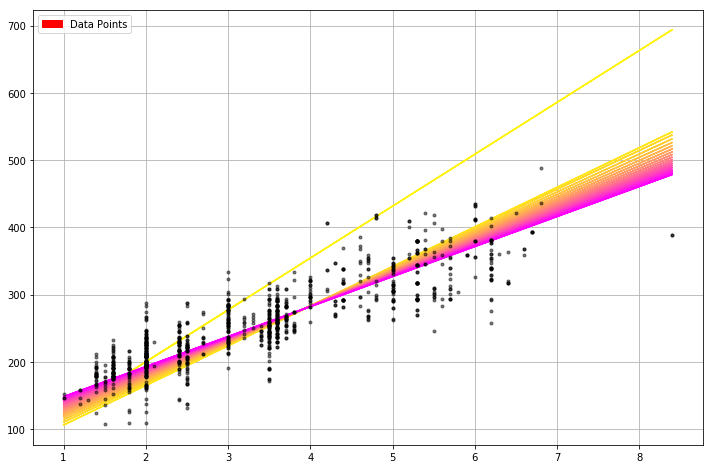

In [13]:
plt.figure(figsize=(12,8))
cr, cg, cb = (1.0, 1.0, 0.0)
for f in train_data:
    cb += 1.0 / len(train_data)
    cg -= 1.0 / len(train_data)
    if cb > 1.0: cb = 1.0
    if cg < 0.0: cg = 0.0
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(X_train)
    line = plt.plot(X_train, f_y)
    plt.setp(line, color=(cr,cg,cb))

plt.plot(X_train, y_train, 'k.', alpha=0.5)


green_line = mpatches.Patch(color='red', label='Data Points')

plt.legend(handles=[green_line])
plt.grid()

plt.show()

# Logistic Regression

In [14]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
%matplotlib inline

In [15]:
X, y = load_iris(return_X_y=True)
y = pd.get_dummies(y).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

__Step 0:__ Initialize the variables and placeholders.

In [16]:
n_Features = X_train.shape[1]
n_Labels = y_train.shape[1]

X_place = tf.placeholder(tf.float32, [None, n_Features])
y_place = tf.placeholder(tf.float32, [None, n_Labels])

In [17]:
weights = tf.Variable(tf.random_normal([n_Features,n_Labels],
                                       mean=0,
                                       stddev=0.01,
                                       name="weights"))

bias = tf.Variable(tf.random_normal([1,n_Labels],
                                    mean=0,
                                    stddev=0.01,
                                    name="bias"))

__Step 1:__ Define the logistic regression function
$$\hat y = sigmoid(\textbf W x + \textbf b)$$

In [18]:
apply_weights = tf.matmul(X_place, weights, name="apply_weights")

In [19]:
add_bias = tf.add(apply_weights, bias, name="add_bias")

In [20]:
activation = tf.nn.sigmoid(add_bias, name="activation")

__Step 2:__ Define the ```loss``` function.

In [21]:
loss = tf.nn.l2_loss(activation-y_place, name="squared_error_cost")

__Step 3:__ Define the ```optimizer``` with an apt learning rate.

The cost function for Logistic regression is different for Linear regression, in which the cost function with respect to the parameters for Logistic regression is nonconvex but the cost function for Linear regression is convex. That means that the cost function for Logistic regression has local minimums and there is a chance that you can get stuck in one of the local minimums. While the cost function for Linear regression only has a global minimum because it is convex. So choosing the right learning rate is important for logistic regression, if the learning rate is too large you might overshoot the Global minimum and if the learning rate is too small you could get stuck in a local minimum.

In [22]:
learning_rate = tf.train.exponential_decay(learning_rate=0.0008,
                                          global_step= 1,
                                          decay_steps=X_train.shape[0],
                                          decay_rate= 0.95,
                                          staircase=True)

optimizer = tf.train.GradientDescentOptimizer(learning_rate)

__Step 4:__ Define a training method for our graph.

In [23]:
train = optimizer.minimize(loss)

__Step 5:__ Initialize the variables.

In [24]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

__Step 6:__ Start the optimization.

In [25]:
# Initialize reporting variables
cost = 0
diff = 1
epochs = []
loss_vals = []

print("Step\t Loss\t\t Change in Loss")
print("-----------------------------------------------------------")
# Training epochs
for i in range(2501):
    if i > 1 and diff < .0001:
        print("change in cost %g; convergence."%diff)
        break
    else:
        # Run training step
        step = sess.run(train, feed_dict={X_place: X_train, y_place: y_train})
        if i % 50 == 0:
            epochs.append(i)
            new_cost = sess.run(loss, feed_dict={X_place: X_train, y_place: y_train})
            loss_vals.append(new_cost)
            diff = abs(new_cost - cost)
            cost = new_cost

            print(i, "\t",  
                  "{0:.3f}".format(new_cost), 
                  "\t", "{0:.4f}".format(diff))
print("-----------------------------------------------------------")

Step	 Loss		 Change in Loss
-----------------------------------------------------------
0 	 40.809 	 40.8093
50 	 26.511 	 14.2987
100 	 22.656 	 3.8548
150 	 20.950 	 1.7054
200 	 19.950 	 1.0002
250 	 19.259 	 0.6916
300 	 18.731 	 0.5278
350 	 18.302 	 0.4283
400 	 17.941 	 0.3617
450 	 17.627 	 0.3138
500 	 17.349 	 0.2775
550 	 17.101 	 0.2487
600 	 16.876 	 0.2252
650 	 16.670 	 0.2056
700 	 16.481 	 0.1890
750 	 16.306 	 0.1746
800 	 16.144 	 0.1620
850 	 15.994 	 0.1509
900 	 15.853 	 0.1410
950 	 15.720 	 0.1321
1000 	 15.596 	 0.1242
1050 	 15.479 	 0.1170
1100 	 15.369 	 0.1104
1150 	 15.264 	 0.1044
1200 	 15.165 	 0.0990
1250 	 15.071 	 0.0939
1300 	 14.982 	 0.0893
1350 	 14.897 	 0.0850
1400 	 14.816 	 0.0810
1450 	 14.739 	 0.0773
1500 	 14.665 	 0.0739
1550 	 14.594 	 0.0707
1600 	 14.526 	 0.0677
1650 	 14.462 	 0.0649
1700 	 14.399 	 0.0623
1750 	 14.339 	 0.0599
1800 	 14.282 	 0.0576
1850 	 14.226 	 0.0554
1900 	 14.173 	 0.0533
1950 	 14.122 	 0.0514
2000 	 14.072

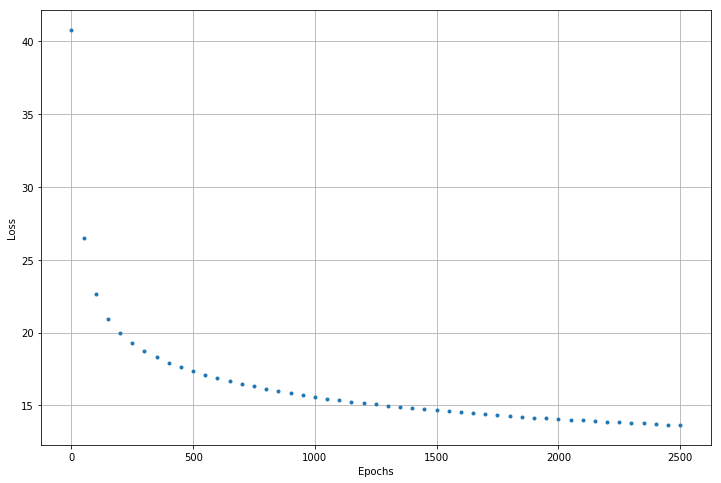

In [26]:
plt.figure(figsize=(12,8))
plt.plot(np.arange(0, 2501, 50), loss_vals, '.')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

In [27]:
pred_proba = sess.run(activation, feed_dict={X_place: X_test})

In [28]:
def get_pred_from_proba(proba):
    y_pred = np.zeros([y_test.shape[0], 3])
    pred = np.argmax(proba, axis=1)
    for i, element in enumerate(pred):
        y_pred[i][element] = 1
    return(y_pred)

In [29]:
y_pred = get_pred_from_proba(pred_proba)

In [30]:
from sklearn.metrics import accuracy_score

In [31]:
print("Test Accuracy: ", "{0:.3f}".format(np.round(accuracy_score(y_test, y_pred), 3)))

Test Accuracy:  0.967
